In [1]:
import numpy as np
import pandas as pd


In [2]:
data1 = pd.read_csv('./dataset1.csv',header=None)
data1.head()

,0,1,2,3
0,dataSetId,name,age,gender
1,1,강수연,26,1
2,2,오세연,29,1
3,3,김동관,29,0
4,4,김지영,24,1


In [3]:
data2 = pd.read_csv('./dataset2.csv',header=None)
data2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,dataSetId,name,keyboardType,testSentense,userTypedSentense,testSentenseCharacterCount,userTypedSentenseCharacterCount,timeInterval,characterPerSecond,testErrorResult,userErrorResult,substitutionErrorCount,omissionErrorCount,insertionErrorCount,spacingErrorCount,isCorrect
1,1,강수연,WG Test,두 작품을 연출했고 세 편을 제작했다,두 작품을 연출했고 세 편을 제작했다,47,47,19.705,2.385181426,,,0,0,0,0,true
2,1,강수연,BG Test,그가 잠든 묘소에서 추모 집회가 열렸는데요,그가 잠든 묘소에서 추모 집회가 열렸는데요,48,48,16.6217,2.887791261,,,0,0,0,0,true
3,1,강수연,GG Test,개장전 체크해야할 리포트 점검해보겠습니다,개장전 체크해야할 리포트 점검해보겠습니다,49,49,15.8772,3.086186481,,,0,0,0,0,true
4,1,강수연,AG Test,또 청취자 여러분들도 함께 생각해 보시죠,또 청취자 여러분들도 함께 생각해 보시죠,46,46,9.0496,5.083097595,,,0,0,0,0,true


In [4]:
data1 = data1.drop([1],axis=1) #name열 제거
data1.head()

,0,2,3
0,dataSetId,age,gender
1,1,26,1
2,2,29,1
3,3,29,0
4,4,24,1


In [5]:
data2 = data2.drop([1,3,4,6,9,10,11,12,13,14],axis=1)#필요없는 열 제거
data2.head()

,0,2,5,7,8,15
0,dataSetId,keyboardType,testSentenseCharacterCount,timeInterval,characterPerSecond,isCorrect
1,1,WG Test,47,19.705,2.385181426,true
2,1,BG Test,48,16.6217,2.887791261,true
3,1,GG Test,49,15.8772,3.086186481,true
4,1,AG Test,46,9.0496,5.083097595,true


In [6]:
merge = pd.merge(data1, data2, on=0)
merge.head() #gender : f=1,m=0 / keyboardType WG Test = 1, BG Test = 2, GG =3 ,AG=4, WW = 5/iscorrect true=0,false=1

,0,2_x,3,2_y,5,7,8,15
0,dataSetId,age,gender,keyboardType,testSentenseCharacterCount,timeInterval,characterPerSecond,isCorrect
1,1,26,1,WG Test,47,19.705,2.385181426,true
2,1,26,1,BG Test,48,16.6217,2.887791261,true
3,1,26,1,GG Test,49,15.8772,3.086186481,true
4,1,26,1,AG Test,46,9.0496,5.083097595,true


In [7]:
final= merge.rename(columns = {'2_x':'age'})

In [8]:
final = final.rename(columns = {0:'dataSetId'})

In [9]:
final = final.rename(columns = {3:'gender'})

In [10]:
final = final.rename(columns = {'2_y':'keyboardType'})

In [11]:
final = final.rename(columns = {5:'testSentenseCharacterCount'})

In [12]:
final = final.rename(columns = {7:'timeInterval'})

In [13]:
final = final.rename(columns = {8:'characterPerSecond'})

In [14]:
final = final.rename(columns = {15:'isCorrect'})

In [15]:
final = final.drop([0],axis=0)

In [16]:
final = final.drop(['dataSetId'],axis=1)
final.head()

,age,gender,keyboardType,testSentenseCharacterCount,timeInterval,characterPerSecond,isCorrect
1,26,1,WG Test,47,19.705,2.385181426,true
2,26,1,BG Test,48,16.6217,2.887791261,true
3,26,1,GG Test,49,15.8772,3.086186481,true
4,26,1,AG Test,46,9.0496,5.083097595,true
5,26,1,WW Test,45,12.8488,3.502272586,true


In [17]:
final.loc[final["isCorrect"] == " true", "tf"] = "0" 

In [18]:
final.loc[final["isCorrect"] == " false", "tf"] = "1" 

In [19]:
final.drop(["isCorrect"],axis=1,inplace=True)

In [20]:
final.loc[final["keyboardType"] == " WG Test", "keyboardtypeinnum"] = "1" #keyboardType WG Test = 1, BG Test = 2, GG =3 ,AG=4, WW = 5

In [21]:
final.loc[final["keyboardType"] == " WG", "keyboardtypeinnum"] = "1"

In [22]:
final.loc[final["keyboardType"] == " BG Test", "keyboardtypeinnum"] = "2"

In [23]:
final.loc[final["keyboardType"] == " BG", "keyboardtypeinnum"] = "2"

In [24]:
final.loc[final["keyboardType"] == " GG Test", "keyboardtypeinnum"] = "3"

In [25]:
final.loc[final["keyboardType"] == " GG", "keyboardtypeinnum"] = "3"

In [26]:
final.loc[final["keyboardType"] == " AG Test", "keyboardtypeinnum"] = "4"

In [27]:
final.loc[final["keyboardType"] == " AG", "keyboardtypeinnum"] = "4"

In [28]:
final.loc[final["keyboardType"] == " WW", "keyboardtypeinnum"] = "5"

In [29]:
final.loc[final["keyboardType"] == " WW Test", "keyboardtypeinnum"] = "5"

In [30]:
final.isnull().sum()

age                           0
gender                        0
keyboardType                  0
testSentenseCharacterCount    0
timeInterval                  0
characterPerSecond            0
tf                            0
keyboardtypeinnum             0
dtype: int64

In [31]:
final=final.drop(['gender'],axis=1)

In [32]:
final=final.drop(['testSentenseCharacterCount'],axis=1)

In [33]:
final=final.drop(['keyboardType'],axis=1)

In [34]:
final

,age,timeInterval,characterPerSecond,tf,keyboardtypeinnum
1,26,19.705,2.385181426,0,1
2,26,16.6217,2.887791261,0,2
3,26,15.8772,3.086186481,0,3
4,26,9.0496,5.083097595,0,4
5,26,12.8488,3.502272586,0,5
...,...,...,...,...,...
1242,22,16.8766,2.60716021,0,1
1243,22,12.159,3.783205856,0,1
1244,22,14.0282,3.136539257,0,1
1245,22,17.5309,2.738022577,0,1


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans #library for K-Means Clustering
from sklearn import datasets

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [37]:
final1=final.drop(['age'],axis=1)
final1

,timeInterval,characterPerSecond,tf,keyboardtypeinnum
1,19.705,2.385181426,0,1
2,16.6217,2.887791261,0,2
3,15.8772,3.086186481,0,3
4,9.0496,5.083097595,0,4
5,12.8488,3.502272586,0,5
...,...,...,...,...
1242,16.8766,2.60716021,0,1
1243,12.159,3.783205856,0,1
1244,14.0282,3.136539257,0,1
1245,17.5309,2.738022577,0,1


In [56]:
df6=pd.DataFrame(final)

In [62]:
df6

,age,timeInterval,characterPerSecond,tf,keyboardtypeinnum,chartime
1,26,19.705,2.385181426,0,1,0
2,26,16.6217,2.887791261,0,2,0
3,26,15.8772,3.086186481,0,3,0
4,26,9.0496,5.083097595,0,4,0
5,26,12.8488,3.502272586,0,5,0
...,...,...,...,...,...,...
1242,22,16.8766,2.60716021,0,1,0
1243,22,12.159,3.783205856,0,1,0
1244,22,14.0282,3.136539257,0,1,0
1245,22,17.5309,2.738022577,0,1,0


In [63]:
df6 = df6.astype({'characterPerSecond':'float'})

In [64]:
df6['chartime']=0

In [68]:
for i in range(1, len(df6)+1):
    if df6['characterPerSecond'][i] >= 1 and df6['characterPerSecond'][i] <2:
        df6['chartime'][i] = 1
    if df6['characterPerSecond'][i] >= 2 and df6['characterPerSecond'][i] < 3:
        df6['chartime'][i] = 2
    if df6['characterPerSecond'][i] >= 3 and df6['characterPerSecond'][i] < 4:
        df6['chartime'][i] = 3
    if df6['characterPerSecond'][i] >= 4 and df6['characterPerSecond'][i] < 5:
        df6['chartime'][i] = 4
    if df6['characterPerSecond'][i] >= 5 and df6['characterPerSecond'][i] < 6:
        df6['chartime'][i] = 5 
    if df6['characterPerSecond'][i] >= 6 and df6['characterPerSecond'][i] < 7:
        df6['chartime'][i] = 6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\

In [69]:
df6

,age,timeInterval,characterPerSecond,tf,keyboardtypeinnum,chartime
1,26,19.705,2.385181,0,1,2
2,26,16.6217,2.887791,0,2,2
3,26,15.8772,3.086186,0,3,3
4,26,9.0496,5.083098,0,4,5
5,26,12.8488,3.502273,0,5,3
...,...,...,...,...,...,...
1242,22,16.8766,2.607160,0,1,2
1243,22,12.159,3.783206,0,1,3
1244,22,14.0282,3.136539,0,1,3
1245,22,17.5309,2.738023,0,1,2


In [70]:
final4=df6.drop(['age'],axis=1)

In [71]:
final4=df6.drop(['keyboardtypeinnum'],axis=1)
final4

,age,timeInterval,characterPerSecond,tf,chartime
1,26,19.705,2.385181,0,2
2,26,16.6217,2.887791,0,2
3,26,15.8772,3.086186,0,3
4,26,9.0496,5.083098,0,5
5,26,12.8488,3.502273,0,3
...,...,...,...,...,...
1242,22,16.8766,2.607160,0,2
1243,22,12.159,3.783206,0,3
1244,22,14.0282,3.136539,0,3
1245,22,17.5309,2.738023,0,2


I used final4 data that processed missing value.

Chartime is an integer representation of CharacterPerSecond.

In [72]:
data5 = df6.iloc[:, 1:3].values
data5

array([['19.705', 2.385181426],
       ['16.6217', 2.887791261],
       ['15.8772', 3.086186481],
       ...,
       ['14.0282', 3.136539257],
       ['17.5309', 2.738022577],
       ['17.1664', 2.737906608]], dtype=object)

Select the column to be used for analysis.

I proceeded Hierarchical Clustering through the ward method algorithm.

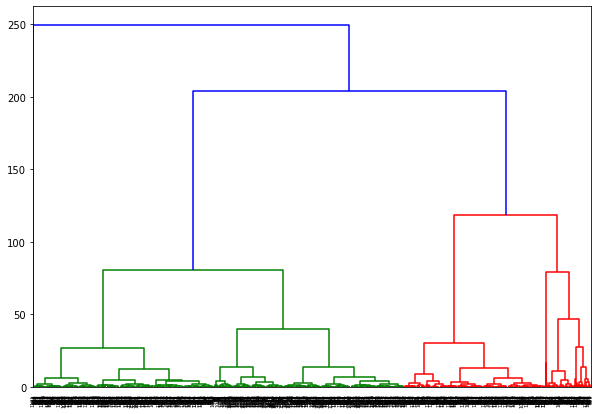

In [73]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(data5, method='ward'))

The dendrogram represents a measure of how similar the values of the vertical axis at the moment when only two branches are combined.

In [74]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data5)

array([1, 1, 1, ..., 4, 1, 1], dtype=int64)

The above result is the result of a cluster analysis.

In case of sklearn, there is no function that is checked through dendrogram. Therefore, the scipy library was used to carry out visualization through the dendrogram.

Text(0, 0.5, 'characterPerSecond')

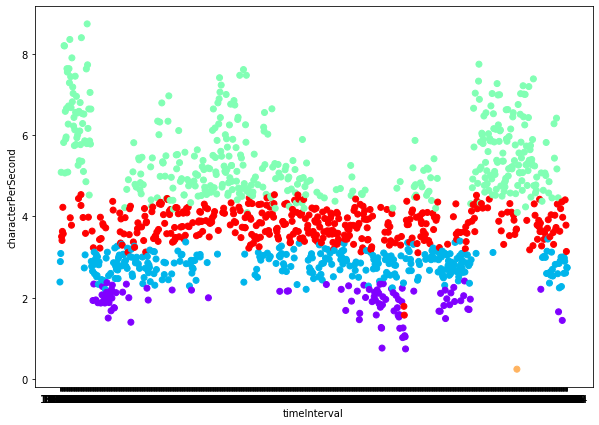

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(data5[:,0], data5[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel('timeInterval')
plt.ylabel('characterPerSecond')

##Result
The final results of the cluster formation were presented through different colored scatter plots.

Using characterPerSecond and keyboardtypeinnum, I clustered the data into five clusters.

Analysis showed that keyboard type 1, 2 and keyboard type 3,4,5 could be clustered which is (WG test, BG Test) and (GG test, AG test, WW test).

Using characterPerSecond and age, I also cluster tf.

Clusters are divided by color and each color has its own characteristics.

Purple clusters exist between 1 and 3 of characterPerSecond, blue clusters exist between 2 and 4 of characterPerSecond, red clusters exist between 3 and 5 of characterPerSecond, green clusters exist more than 4 of characterPerSecond, and yellow clusters exist less than 1 charaterPerSecond.

This results can be used by reprocessing step for other algorithms.

##objective

My goal is to grouping objects step by step from close group to layer using Hierarchical clustering algorithm. 

I grouped objects by using ‘timeinterval’ and ‘characterPerSecond’ column to be used for analysis. 

I proceeded Hierarchical Clustering through the ward method algorithm.

##method

data processing : handling missing values

analysismethod : word method algorithm, dendogram